In [72]:
# Import the libraries
import os
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from glob import glob
import matplotlib.pyplot as plt

In [73]:
# Defining the constants
INPUT_SIZE = [224, 224]

TRAIN_PATH = 'Datasets/Train'
TEST_PATH = 'Datasets/Test'

In [74]:
resnet = ResNet50(input_shape=INPUT_SIZE+[3], include_top=False, weights='imagenet')

In [75]:
for layer in resnet.layers:
    layer.trainable=False

In [76]:
folders = glob(TRAIN_PATH+'/*')

In [77]:
### Add an output layer
x = Flatten()(resnet.output)

In [78]:
output_layer = Dense(len(folders), activation='softmax')(x)

In [79]:
model = Model(inputs=resnet.input, outputs=output_layer)

In [80]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [81]:
# Prepare train and test set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [82]:
training_set = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=INPUT_SIZE,
    batch_size=32,
    class_mode='categorical'
)
training_set

Found 64 images belonging to 3 classes.


In [83]:
test_set = train_datagen.flow_from_directory(
    TEST_PATH,
    target_size=INPUT_SIZE,
    batch_size=32,
    class_mode='categorical'
)
test_set

Found 58 images belonging to 3 classes.


In [84]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 11s 6s/step - loss: 4.1980 - accuracy: 0.2500 - val_loss: 7.9934 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 8s 5s/step - loss: 9.6582 - accuracy: 0.3750 - val_loss: 6.0054 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 5.4586 - accuracy: 0.4167 - val_loss: 11.9844 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 8s 5s/step - loss: 7.2804 - accuracy: 0.3646 - val_loss: 7.7274 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 8s 5s/step - loss: 4.5217 - accuracy: 0.5417 - val_loss: 3.4769 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 2.6354 - accuracy: 0.4062 - val_loss: 3.5113 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 9s 6s/step - loss: 3.1262 - accuracy: 0.4375 - val_loss: 3.2174 - val_accuracy: 0.4483
Epoch 8/50
2/2 [=======================

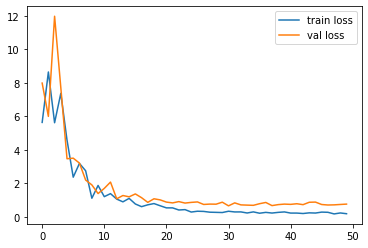

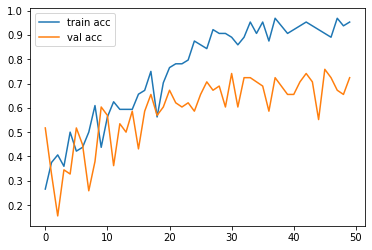

<Figure size 432x288 with 0 Axes>

In [85]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [86]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

### Load model and perform prediction

In [87]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('model_resnet50.h5')

In [89]:
img=image.load_img('Datasets/Test/lamborghini/1.jpg',target_size=(224,224))

In [90]:
x=image.img_to_array(img)
x

array([[[ 70.,  75.,  81.],
        [ 48.,  53.,  59.],
        [135., 140., 144.],
        ...,
        [ 75.,  70.,  67.],
        [ 88.,  79.,  80.],
        [ 94.,  85.,  86.]],

       [[  2.,   7.,  13.],
        [  1.,   6.,  10.],
        [ 11.,  16.,  20.],
        ...,
        [ 71.,  66.,  63.],
        [ 87.,  78.,  79.],
        [ 89.,  80.,  81.]],

       [[ 34.,  39.,  43.],
        [ 68.,  73.,  77.],
        [ 16.,  21.,  25.],
        ...,
        [105., 100.,  97.],
        [ 72.,  63.,  64.],
        [ 75.,  66.,  67.]],

       ...,

       [[ 34.,  33.,  39.],
        [ 35.,  34.,  40.],
        [ 43.,  42.,  48.],
        ...,
        [200., 199., 205.],
        [144., 145., 150.],
        [123., 124., 129.]],

       [[ 32.,  31.,  37.],
        [ 34.,  33.,  39.],
        [ 44.,  43.,  49.],
        ...,
        [210., 209., 215.],
        [226., 227., 232.],
        [210., 211., 216.]],

       [[ 33.,  32.,  38.],
        [ 35.,  34.,  40.],
        [ 43.,  

In [91]:
x.shape

(224, 224, 3)

In [92]:
x=x/255

In [93]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [94]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
y_pred = model.predict(img_data)

In [96]:
a=np.argmax(model.predict(img_data), axis=1)

## 

In [97]:
a

array([2])